## Airbnb DC Hosting Helper ##

### Executive Summary ###

Airbnb was started in 2007 and has been disrupting the hospitality industry ever since. Hosts on Airbnb offer unique stays and local experiences for travelers that can't be replicated by a stay in a hotel. According to [their site,](https://news.airbnb.com/about-us/) Airbnb has helped over 4 million hosts welcome over 900 million guests in almost every country around the world. 

According to [SmartAsset's](https://smartasset.com/mortgage/where-do-airbnb-hosts-make-the-most-money) 2020 study on the profit potential of rentals in 15 of the largest Airbnb markets in the US, renting out an entire place or room can be a profitable venture. The average expected annual profit of Airbnb hosts renting out a full two bedroom apartment or house after expenses is $20,619 in the cities studied. For hosts renting out a one room in a two-bedroom home on Airbnb in these cities, they could expect to pay about 81% of their rent from renting on average. 

As you could imagine, there is a robust amount of Airbnb information in every major city around the world. To explore this data, [Inside Airbnb](http://insideairbnb.com/index.html) created an independent, non-commercial website that scrapes publicly available listing and review data from Airbnb every month and allows anyone to explore or work with this information.

This information can useful to many parties working with Airbnb. For this project, I will aim to use this information to help hosts understand what makes and Airbnb listing the most popular and what they could focus on to make their listing more competitive and increase their profits. I will specifically be focusing on Washington DC as my case study. I will also use the [Foursquare API](https://developer.foursquare.com/) to gather information on type of venues in each neighborhood to get a better idea of the city from a tourist's point of view and see if this impacts the Airbnb listing popularity.

### Problem Statement ###

I will create the best binary clasfication model to predict whether or not an Airbnb listing in DC will be considered popular or not compared to the current listing competition. In addition to the best predictive model, I will create a highly interpretive model to help hosts understand what features they could improve on their listing to increase popularity. These models will be deployed together an app that hosts can use to make their listings as strong as possible.

There are a few important metrics to point out for this project. The first is how to determine the binary classification of the listing being popular or not. I will use a combination of the number of ratings and the average rating to calculate popularity. Listings with over 50 reviews and a 4 star rating will be considered popular. I will also dig into any trends of the 0 rated or reviewed listings and see there are any commonalities between them and if they should be included in the model or not. The other metric to focus on and optimize will be measuring the accuracy of the model. I will focus on accuracy score specifically, as all types of classifications and misclassifications are equally important for this model. 



Other goals for project - 

2. cool city visuals

3. Explore themes in text data - descriptions for neighborhoods, themes in reviews


questions- drop with no ratings? test both ways

product- use logistic regression or glm for highly interpretable results as to what could help make host's place more popular

also a best predictive model at whether or not place is popular

Import libraries and read in data

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json, requests

In [41]:
pd.set_option('display.max_columns', 300)

In [42]:
pd.set_option('display.max_rows', 300)

In [43]:
listings = pd.read_csv('../data/listings.csv.gz')

In [44]:
reviews = pd.read_csv('../data/reviews.csv.gz')

In [45]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3686,https://www.airbnb.com/rooms/3686,20210710190002,2021-07-11,Vita's Hideaway,IMPORTANT NOTES<br />* Carefully read and be s...,We love that our neighborhood is up and coming...,https://a0.muscache.com/pictures/61e02c7e-3d66...,4645,https://www.airbnb.com/users/show/4645,Vita,2008-11-26,"Washington D.C., District of Columbia, United ...","I am a literary scholar, teacher, poet, vegan ...",within a day,80%,75%,f,https://a0.muscache.com/im/users/4645/profile_...,https://a0.muscache.com/im/users/4645/profile_...,Anacostia,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Washington, District of Columbia, United States",Historic Anacostia,NaN,38.86339,-76.98889,Private room in house,Private room,1,NaN,1 private bath,1.0,1.0,"[""First aid kit"", ""Long term stays allowed"", ""...",$55.00,2,365,2,2,365,365,2.0,365.0,NaN,t,1,31,61,336,2021-07-11,75,3,0,2014-06-22,2021-01-12,4.59,4.71,4.44,4.89,4.82,3.80,4.58,NaN,f,2,0,2,0,0.87
1,3943,https://www.airbnb.com/rooms/3943,20210710190002,2021-07-11,Historic Rowhouse Near Monuments,Please contact us before booking to make sure ...,This rowhouse is centrally located in the hear...,https://a0.muscache.com/pictures/432713/fab7dd...,5059,https://www.airbnb.com/users/show/5059,Vasa,2008-12-12,"Washington, District of Columbia, United States",I have been living and working in DC for the l...,within a few hours,100%,29%,f,https://a0.muscache.com/im/pictures/user/8ec69...,https://a0.muscache.com/im/pictures/user/8ec69...,Eckington,0.0,0.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Washington, District of Columbia, United States","Edgewood, Bloomingdale, Truxton Circle, Eckington",NaN,38.91195,-77.00456,Private room in townhouse,Private room,2,NaN,1.5 shared baths,1.0,1.0,"[""Cooking basics"", ""First aid kit"", ""Dedicated...",$70.00,2,1125,2,2,1125,1125,2.0,1125.0,NaN,t,9,39,69,344,2021-07-11,429,0,0,2010-08-08,2018-08-07,4.82,4.89,4.91,4.94,4.90,4.54,4.74,NaN,f,2,0,2,0,3.22
2,4529,https://www.airbnb.com/rooms/4529,20210710190002,2021-07-11,Bertina's House Part One,This is large private bedroom with plenty of...,Very quiet neighborhood and it is easy accessi...,https://a0.muscache.com/pictures/86072003/6709...,5803,https://www.airbnb.com/users/show/5803,Bertina'S House,2008-12-30,"Washington, District of Columbia, United States","I am an easy going, laid back person who loves...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/5803/profile_...,https://a0.muscache.com/im/users/5803/profile_...,Eastland Gardens,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Washington, District of Columbia, United States","Eastland Gardens, Kenilworth",NaN,38.90585,-76.94469,Private roo

In [46]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3686,131293,2010-11-01,257234,Callie,Staying with Levita and her wonderful family w...
1,3686,150766,2010-12-08,255888,Patrick,"Vita is a very welcoming, helpful and friendly..."
2,3686,177749,2011-02-02,366688,Benjamin,"This was my first time using ""airbnb"" and it m..."
3,3686,197451,2011-03-12,213492,T.J.,"First, Vita saved my work week by providing me..."
4,3686,213212,2011-03-30,428455,Pete & Leila,Great host! Very welcoming and organised. I st...


In [47]:
listings.shape

(8033, 74)

In [48]:
reviews.shape

(296276, 6)

In [52]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8033 entries, 0 to 8032
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            8033 non-null   int64  
 1   listing_url                                   8033 non-null   object 
 2   scrape_id                                     8033 non-null   int64  
 3   last_scraped                                  8033 non-null   object 
 4   name                                          8032 non-null   object 
 5   description                                   7875 non-null   object 
 6   neighborhood_overview                         5144 non-null   object 
 7   picture_url                                   8033 non-null   object 
 8   host_id                                       8033 non-null   int64  
 9   host_url                                      8033 non-null   o

In [53]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296276 entries, 0 to 296275
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     296276 non-null  int64 
 1   id             296276 non-null  int64 
 2   date           296276 non-null  object
 3   reviewer_id    296276 non-null  int64 
 4   reviewer_name  296276 non-null  object
 5   comments       296086 non-null  object
dtypes: int64(3), object(3)
memory usage: 13.6+ MB


Create list of dc neighborhoods to work with

In [54]:
listings['neighbourhood_cleansed'].value_counts()

Capitol Hill, Lincoln Park                                                                           746
Union Station, Stanton Park, Kingman Park                                                            724
Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View                                           687
Dupont Circle, Connecticut Avenue/K Street                                                           649
Shaw, Logan Circle                                                                                   548
Edgewood, Bloomingdale, Truxton Circle, Eckington                                                    531
Brightwood Park, Crestwood, Petworth                                                                 416
Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street                        386
Kalorama Heights, Adams Morgan, Lanier Heights                                                       347
West End, Foggy Bottom, GWU                            

In [55]:
list_neighborhoods = np.unique(listings['neighbourhood_cleansed'])
list_neighborhoods

array(['Brightwood Park, Crestwood, Petworth',
       'Brookland, Brentwood, Langdon', 'Capitol Hill, Lincoln Park',
       'Capitol View, Marshall Heights, Benning Heights',
       'Cathedral Heights, McLean Gardens, Glover Park',
       'Cleveland Park, Woodley Park, Massachusetts Avenue Heights, Woodland-Normanstone Terrace',
       'Colonial Village, Shepherd Park, North Portal Estates',
       'Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View',
       'Congress Heights, Bellevue, Washington Highlands',
       'Deanwood, Burrville, Grant Park, Lincoln Heights, Fairmont Heights',
       'Douglas, Shipley Terrace',
       'Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street',
       'Dupont Circle, Connecticut Avenue/K Street',
       'Eastland Gardens, Kenilworth',
       'Edgewood, Bloomingdale, Truxton Circle, Eckington',
       'Fairfax Village, Naylor Gardens, Hillcrest, Summit Park',
       'Friendship Heights, American University Park, Tenle

Create a locations dataframe and group by neighborhood. Find the average latitude and longitude for each neighborhood to serve as a center point of the neighborhoods for foursquare lookups.

In [56]:
locations = pd.concat([ listings[['neighbourhood_cleansed']] , listings[['latitude']] , listings[['longitude']]], axis=1)

In [57]:
locations.head()

,neighbourhood_cleansed,latitude,longitude
0,Historic Anacostia,38.86339,-76.98889
1,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.91195,-77.00456
2,"Eastland Gardens, Kenilworth",38.90585,-76.94469
3,"Ivy City, Arboretum, Trinidad, Carver Langston",38.91217,-76.99249
4,"Kalorama Heights, Adams Morgan, Lanier Heights",38.91887,-77.04008


In [58]:
locations = locations.groupby('neighbourhood_cleansed').mean()
locations

,latitude,longitude
neighbourhood_cleansed,,
"Brightwood Park, Crestwood, Petworth",38.946504,-77.024729
"Brookland, Brentwood, Langdon",38.926110,-76.983434
"Capitol Hill, Lincoln Park",38.884692,-76.992667
"Capitol View, Marshall Heights, Benning Heights",38.885287,-76.931463
"Cathedral Heights, McLean Gardens, Glover Park",38.924179,-77.075507
"Cleveland Park, Woodley Park, Massachusetts Avenue Heights, Woodland-Normanstone Terrace",38.931255,-77.059736
"Colonial Village, Shepherd Park, North Portal Estates",38.986958,-77.035842
"Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View",38.929396,-77.031084
"Congress Heights, Bellevue, Washington Highlands",38.835467,-76.999961


In [59]:
locations.reset_index(inplace=True)

In [60]:
locations

,neighbourhood_cleansed,latitude,longitude
0,"Brightwood Park, Crestwood, Petworth",38.946504,-77.024729
1,"Brookland, Brentwood, Langdon",38.926110,-76.983434
2,"Capitol Hill, Lincoln Park",38.884692,-76.992667
3,"Capitol View, Marshall Heights, Benning Heights",38.885287,-76.931463
4,"Cathedral Heights, McLean Gardens, Glover Park",38.924179,-77.075507
5,"Cleveland Park, Woodley Park, Massachusetts Av...",38.931255,-77.059736
6,"Colonial Village, Shepherd Park, North Portal ...",38.986958,-77.035842
7,"Columbia Heights, Mt. Pleasant, Pleasant Plain...",38.929396,-77.031084
8,"Congress Heights, Bellevue, Washington Highlands",38.835467,-76.999961
9,"Deanwood, Burrville, Grant Park, Lincoln Heigh...",38.900688,-76.928999


Get list of average latitude and longitude coordinates by neighborhood for next steps with foursquare lookups.

In [61]:
lat_lon = list(zip(locations['latitude'], locations['longitude']))
lat_lon = [str(lat_lon[i]).replace('(','').replace(')','') for i in range(0,len(lat_lon))]

In [74]:
lat_lon[0]

'38.946504018489904, -77.02472855730106'

Create dictionary of venue categories to loop through for each neighborhood

In [63]:
category_dict = {
    'historic site': '4deefb944765f83613cdba6e',
    'museum': '4bf58dd8d48988d181941735',
    'metro': '4bf58dd8d48988d1fd931735',
    'music venue': '4bf58dd8d48988d1e5931735',
    'perfomring arts venue': '4bf58dd8d48988d1f2931735',
    'college and university': '4d4b7105d754a06372d81259',
    'food': '4d4b7105d754a06374d81259',
    'nightlife spot': '4d4b7105d754a06376d81259',
    'outdoors and recreation': '4d4b7105d754a06377d81259',
    'government building': '4bf58dd8d48988d126941735',
    'clothing store': '4bf58dd8d48988d103951735'
                }

In [64]:
cat_list = [value for key, value in category_dict.items() ]
cat_list

['4deefb944765f83613cdba6e',
 '4bf58dd8d48988d181941735',
 '4bf58dd8d48988d1fd931735',
 '4bf58dd8d48988d1e5931735',
 '4bf58dd8d48988d1f2931735',
 '4d4b7105d754a06372d81259',
 '4d4b7105d754a06374d81259',
 '4d4b7105d754a06376d81259',
 '4d4b7105d754a06377d81259',
 '4bf58dd8d48988d126941735',
 '4bf58dd8d48988d103951735']

In [65]:
cat_key_list = [key for key, value in category_dict.items() ]
cat_key_list

['historic site',
 'museum',
 'metro',
 'music venue',
 'perfomring arts venue',
 'college and university',
 'food',
 'nightlife spot',
 'outdoors and recreation',
 'government building',
 'clothing store']

Set up Foursquare API pull on neighborhood venues

In [84]:
#set up first pull

venue_list = []

for j in cat_list:

    url = 'https://api.foursquare.com/v2/venues/search'

    params = dict(
    client_id='JWWPNW4JVAJ4OLM3ZSWASPF0R2ZP4DVHKQ52FGRLK0514J3Q',
    client_secret='NL0E1FVEIB0I1N22M51IRHPVUW45WDG0RSFF4IPW5Z01HBXM',
    v='20180323',
    ll= lat_lon[0],
    categoryId = j,
    limit=50,
    radius=1000
    #.6 mile radius
    )

    #make request
    req = requests.get(url=url, params=params)

    #pull necessary data
    data = json.loads(req.text)

    x = len(data['response']['venues'])
    
    venue_list.append(x)
    
full = pd.DataFrame(venue_list).T

full.columns = cat_key_list

In [85]:
full

,historic site,museum,metro,music venue,perfomring arts venue,college and university,food,nightlife spot,outdoors and recreation,government building,clothing store
0,1,1,1,3,5,8,48,15,47,10,10


In [86]:
#set up pulls for the rest of the neighborhoods

for i in lat_lon[1:]:

    venue_list = []
    
    for j in cat_list:

        #set up url for looping
        url = 'https://api.foursquare.com/v2/venues/search'

        params = dict(
        client_id='JWWPNW4JVAJ4OLM3ZSWASPF0R2ZP4DVHKQ52FGRLK0514J3Q',
        client_secret='NL0E1FVEIB0I1N22M51IRHPVUW45WDG0RSFF4IPW5Z01HBXM',
        v='20180323',
        ll= i,
        categoryId = j,
        limit=50,
        radius=1000
        #.6 mile radius
        )

        #make request
        req = requests.get(url=url, params=params)

        #pull necessary data
        data = json.loads(req.text)

        x = len(data['response']['venues'])

        venue_list.append(x)

    temp = pd.DataFrame(venue_list).T

    temp.columns = cat_key_list

    full = pd.concat([full, temp])


In [87]:
full.reset_index(inplace=True)

In [88]:
full

,index,historic site,museum,metro,music venue,perfomring arts venue,college and university,food,nightlife spot,outdoors and recreation,government building,clothing store
0,0,1,1,1,3,5,8,48,15,47,10,10
1,0,0,0,0,2,6,6,44,22,29,10,8
2,0,8,6,2,0,9,13,50,49,46,49,23
3,0,1,0,1,0,0,4,13,1,15,4,0
4,0,5,0,0,1,4,17,48,27,44,24,2
5,0,7,0,2,3,4,10,50,19,46,23,7
6,0,7,3,1,4,3,16,50,19,44,33,7
7,0,7,2,3,22,23,50,50,50,46,39,29
8,0,1,0,0,1,1,8,18,1,17,9,2
9,0,1,0,1,0,0,1,13,2,12,1,0


Combine neighborhood locations df with venue information

In [89]:
neighborhood_venues = pd.concat([locations, full], axis=1)

In [90]:
neighborhood_venues

,neighbourhood_cleansed,latitude,longitude,index,historic site,museum,metro,music venue,perfomring arts venue,college and university,food,nightlife spot,outdoors and recreation,government building,clothing store
0,"Brightwood Park, Crestwood, Petworth",38.946504,-77.024729,0,1,1,1,3,5,8,48,15,47,10,10
1,"Brookland, Brentwood, Langdon",38.926110,-76.983434,0,0,0,0,2,6,6,44,22,29,10,8
2,"Capitol Hill, Lincoln Park",38.884692,-76.992667,0,8,6,2,0,9,13,50,49,46,49,23
3,"Capitol View, Marshall Heights, Benning Heights",38.885287,-76.931463,0,1,0,1,0,0,4,13,1,15,4,0
4,"Cathedral Heights, McLean Gardens, Glover Park",38.924179,-77.075507,0,5,0,0,1,4,17,48,27,44,24,2
5,"Cleveland Park, Woodley Park, Massachusetts Av...",38.931255,-77.059736,0,7,0,2,3,4,10,50,19,46,23,7
6,"Colonial Village, Shepherd Park, North Portal ...",38.986958,-77.035842,0,7,3,1,4,3,16,50,19,44,33,7
7,"Columbia Heights, Mt. Pleasant, Pleasant Plain...",38.929396,-77.031084,0,7,2,3,22,23,50,50,50,46,39,29
8,"Congress Heights, Bellevue, Washington Highlands",38.835467,-76.999961,0,1,0,0,1,1,8,18,1,17,9,2
9,"Deanwood, Burrville, Grant Park, Lincoln Heigh...",38.900688,-76.928999,0,1,0,1,0,0,1,13,2,12,1,0


In [91]:
neighborhood_venues.drop(columns=['index'], inplace=True)

In [92]:
neighborhood_venues.to_csv('../data/neighborhood_venues.csv')

Merge neighborhood venue information with listings

In [93]:
full_listings = listings.merge(neighborhood_venues, on='neighbourhood_cleansed' )

In [94]:
full_listings.sort_values(by='id', inplace=True)

full_listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude_x,longitude_x,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,latitude_y,longitude_y,historic site,museum,metro,music venue,perfomring arts venue,college and university,food,nightlife spot,outdoors and recreation,government building,clothing store
0,3686,https://www.airbnb.com/rooms/3686,20210710190002,2021-07-11,Vita's Hideaway,IMPORTANT NOTES<br />* Carefully read and be s...,We love that our neighborhood is up and coming...,https://a0.muscache.com/pictures/61e02c7e-3d66...,4645,https://www.airbnb.com/users/show/4645,Vita,2008-11-26,"Washington D.C., District of Columbia, United ...","I am a literary scholar, teacher, poet, vegan ...",within a day,80%,75%,f,https://a0.muscache.com/im/users/4645/profile_...,https://a0.muscache.com/im/users/4645/profile_...,Anacostia,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Washington, District of Columbia, United States",Historic Anacostia,NaN,38.86339,-76.98889,Private room in house,Private room,1,NaN,1 private bath,1.0,1.0,"[""First aid kit"", ""Long term stays allowed"", ""...",$55.00,2,365,2,2,365,365,2.0,365.0,NaN,t,1,31,61,336,2021-07-11,75,3,0,2014-06-22,2021-01-12,4.59,4.71,4.44,4.89,4.82,3.80,4.58,NaN,f,2,0,2,0,0.87,38.863293,-76.984760,1,2,1,0,3,10,25,5,28,21,5
65,3943,https://www.airbnb.com/rooms/3943,20210710190002,2021-07-11,Historic Rowhouse Near Monuments,Please contact us before booking to make sure ...,This rowhouse is centrally located in the hear...,https://a0.muscache.com/pictures/432713/fab7dd...,5059,https://www.airbnb.com/users/show/5059,Vasa,2008-12-12,"Washington, District of Columbia, United States",I have been living and working in DC for the l...,within a few hours,100%,29%,f,https://a0.muscache.com/im/pictures/user/8ec69...,https://a0.muscache.com/im/pictures/user/8ec69...,Eckington,0.0,0.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Washington, District of Columbia, United States","Edgewood, Bloomingdale, Truxton Circle, Eckington",NaN,38.91195,-77.00456,Private room in townhouse,Private room,2,NaN,1.5 shared baths,1.0,1.0,"[""Cooking basics"", ""First aid kit"", ""Dedicated...",$70.00,2,1125,2,2,1125,1125,2.0,1125.0,NaN,t,9,39,69,344,2021-07-11,429,0,0,2010-08-08,2018-08-07,4.82,4.89,4.91,4.94,4.90,4.54,4.74,NaN,f,2,0,2,0,3.22,38.916464,-77.008268,2,2,0,7,12,50,50,45,44,31,13
596,4529,https://www.airbnb.com/rooms/4529,20210710190002,2021-07-11,Bertina's House Part One,This is large private bedroom with plenty of...,Very quiet neighborhood and it is easy accessi...,https://a0.muscache.com/pictures/86072003/6709...,5803,https://www.airbnb.com/users/show/5803,Bertina'S House,2008-12-30,"Washington, District of Columbia, United States","I am an easy going, laid back person who loves...",NaN,NaN,NaN,f,https:

In [95]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3686,https://www.airbnb.com/rooms/3686,20210710190002,2021-07-11,Vita's Hideaway,IMPORTANT NOTES<br />* Carefully read and be s...,We love that our neighborhood is up and coming...,https://a0.muscache.com/pictures/61e02c7e-3d66...,4645,https://www.airbnb.com/users/show/4645,Vita,2008-11-26,"Washington D.C., District of Columbia, United ...","I am a literary scholar, teacher, poet, vegan ...",within a day,80%,75%,f,https://a0.muscache.com/im/users/4645/profile_...,https://a0.muscache.com/im/users/4645/profile_...,Anacostia,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Washington, District of Columbia, United States",Historic Anacostia,NaN,38.86339,-76.98889,Private room in house,Private room,1,NaN,1 private bath,1.0,1.0,"[""First aid kit"", ""Long term stays allowed"", ""...",$55.00,2,365,2,2,365,365,2.0,365.0,NaN,t,1,31,61,336,2021-07-11,75,3,0,2014-06-22,2021-01-12,4.59,4.71,4.44,4.89,4.82,3.80,4.58,NaN,f,2,0,2,0,0.87
1,3943,https://www.airbnb.com/rooms/3943,20210710190002,2021-07-11,Historic Rowhouse Near Monuments,Please contact us before booking to make sure ...,This rowhouse is centrally located in the hear...,https://a0.muscache.com/pictures/432713/fab7dd...,5059,https://www.airbnb.com/users/show/5059,Vasa,2008-12-12,"Washington, District of Columbia, United States",I have been living and working in DC for the l...,within a few hours,100%,29%,f,https://a0.muscache.com/im/pictures/user/8ec69...,https://a0.muscache.com/im/pictures/user/8ec69...,Eckington,0.0,0.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Washington, District of Columbia, United States","Edgewood, Bloomingdale, Truxton Circle, Eckington",NaN,38.91195,-77.00456,Private room in townhouse,Private room,2,NaN,1.5 shared baths,1.0,1.0,"[""Cooking basics"", ""First aid kit"", ""Dedicated...",$70.00,2,1125,2,2,1125,1125,2.0,1125.0,NaN,t,9,39,69,344,2021-07-11,429,0,0,2010-08-08,2018-08-07,4.82,4.89,4.91,4.94,4.90,4.54,4.74,NaN,f,2,0,2,0,3.22
2,4529,https://www.airbnb.com/rooms/4529,20210710190002,2021-07-11,Bertina's House Part One,This is large private bedroom with plenty of...,Very quiet neighborhood and it is easy accessi...,https://a0.muscache.com/pictures/86072003/6709...,5803,https://www.airbnb.com/users/show/5803,Bertina'S House,2008-12-30,"Washington, District of Columbia, United States","I am an easy going, laid back person who loves...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/5803/profile_...,https://a0.muscache.com/im/users/5803/profile_...,Eastland Gardens,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Washington, District of Columbia, United States","Eastland Gardens, Kenilworth",NaN,38.90585,-76.94469,Private roo

In [96]:
full_listings.shape

(8033, 87)

In [98]:
full_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8033 entries, 0 to 2683
Data columns (total 87 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            8033 non-null   int64  
 1   listing_url                                   8033 non-null   object 
 2   scrape_id                                     8033 non-null   int64  
 3   last_scraped                                  8033 non-null   object 
 4   name                                          8032 non-null   object 
 5   description                                   7875 non-null   object 
 6   neighborhood_overview                         5144 non-null   object 
 7   picture_url                                   8033 non-null   object 
 8   host_id                                       8033 non-null   int64  
 9   host_url                                      8033 non-null   o

In [100]:
full_listings.drop(columns=[
    'listing_url',
    'scrape_id',
    'last_scraped',
    'picture_url',
    'host_url',
    'host_name',
    'host_thumbnail_url',
    'host_picture_url',
    'neighbourhood',
    'neighbourhood_group_cleansed',
    'latitude_y',
    'longitude_y',
    'calendar_updated',
    'calendar_last_scraped',
    'license'
], inplace=True)

In [101]:
full_listings.shape

(8033, 72)

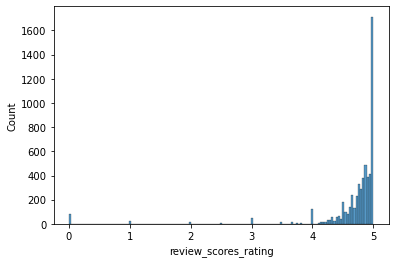

In [102]:
sns.histplot( full_listings['review_scores_rating']);

In [104]:
full_listings['review_scores_rating'].value_counts()

5.00    1528
4.88     152
4.67     151
4.80     146
4.50     142
4.75     136
4.86     133
4.83     132
4.91     130
4.92     130
4.90     126
4.00     122
4.93     114
4.94     112
4.89     106
4.95      99
4.87      96
4.82      96
4.96      90
4.71      88
4.97      87
4.85      86
4.81      81
0.00      81
4.78      73
4.84      65
4.77      64
4.60      62
4.79      61
4.98      61
4.73      61
4.76      61
3.00      50
4.68      46
4.70      46
4.33      46
4.74      43
4.72      41
4.63      40
4.69      37
4.99      37
4.57      34
4.64      33
4.66      31
4.56      30
4.40      25
4.25      25
4.53      25
4.62      24
4.58      23
4.65      23
1.00      23
4.43      22
4.54      22
4.59      21
4.52      21
4.55      20
4.38      20
3.67      18
4.45      17
4.48      17
4.61      17
2.00      16
3.50      16
4.29      15
4.46      14
4.30      12
4.44      12
4.51      11
4.42      11
4.36      10
4.17      10
3.75      10
4.47       9
4.20       8
4.41       8
4.13       8

In [105]:
full_listings['review_scores_rating'].isnull().sum()

2207

<AxesSubplot:xlabel='number_of_reviews', ylabel='Count'>

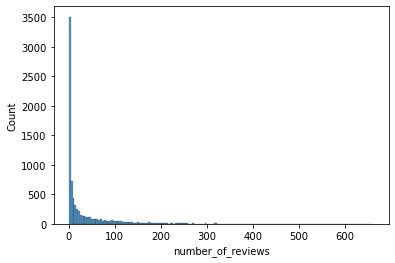

In [106]:
sns.histplot(full_listings['number_of_reviews' ] )

In [107]:
full_listings['number_of_reviews' ].value_counts()

0      2207
1       652
2       389
3       260
4       226
       ... 
449       1
469       1
477       1
521       1
619       1
Name: number_of_reviews, Length: 377, dtype: int64

In [122]:
len(full_listings[(full_listings['number_of_reviews' ]>50) & (full_listings['review_scores_rating']>4.79) ])

1120

In [116]:
full_listings['number_of_reviews_ltm'].value_counts()

0      4367
1       630
2       406
3       262
4       212
5       168
6       157
7       133
8       111
9       101
11      100
12       89
10       73
14       71
13       69
16       58
17       56
15       56
21       46
20       46
18       45
23       42
22       39
25       36
24       36
27       35
19       34
29       31
33       31
31       29
26       27
32       26
28       25
30       20
36       16
35       15
46       15
37       15
34       14
45       13
41       13
42       12
43       12
51       11
39       11
55       11
49       10
48       10
38        9
50        9
40        9
57        8
47        8
44        8
52        8
58        8
53        8
63        7
56        6
60        6
62        6
77        6
61        5
68        4
64        4
54        4
66        4
75        4
84        3
71        3
59        3
73        3
69        3
91        2
87        2
79        2
67        2
83        2
111       2
102       2
98        2
72        2
65        2
82  

In [117]:
full_listings['number_of_reviews_ltm'].count()

8033

In [ ]:
#geo data for maps?

In [ ]:
with open('../data/Neighborhood_Clusters.geojson') as f:
    dc_data = json.load(f)

In [ ]:
dc_data